  Notebook requires Google Drive access for data storage.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## About Dataset


## Dataset Overview

This dataset contains four columns: three feature columns representing TV, Radio, and Newspaper advertising spends, and one target column, Sales. The goal is to identify the relationship between the independent variables (advertising spends) and the dependent variable (Sales) to determine which medium has the strongest influence on sales.








## Key variabale and description

- TV: Advertising budget spent on TV.
- Radio: Advertising budget spent on Radio.
- Newspaper: Advertising budget spent on Newspapers
- Sales: The number of units sold (target variable), which we aim to predict based on the advertising budgets.







## Problem Statement:
Problem Statement:
The aim is to predict sales based on the advertising budgets for TV, Radio, and Newspaper, and identify which medium most significantly impacts sales.










## Importing Libraries and data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

## Exploratory data analysis

In [ ]:
df.head()





,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.shape


(200, 4)

In [ ]:
df.describe()



,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


- **Data visuliazation**
- **Univariate, bivariate, and multivariate analycis**


<Axes: xlabel='TV', ylabel='Density'>

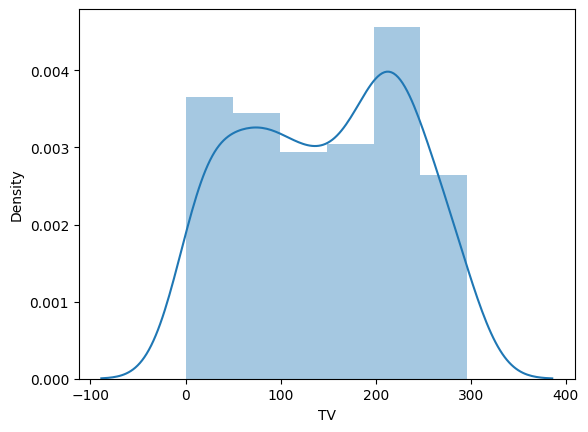

In [ ]:
sns.distplot(df['TV'])

<Axes: xlabel='Radio', ylabel='Density'>

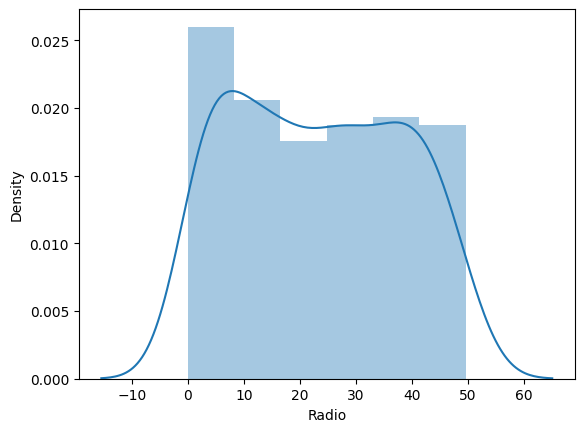

In [ ]:
sns.distplot(df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Density'>

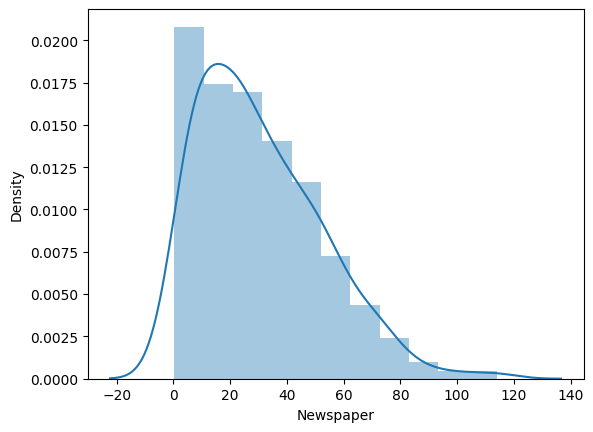

In [ ]:
sns.distplot(df['Newspaper'])

From Univariate analysis I can say that the above histogram displays an irregular distribution that does not resemble a normal distribution.

<Axes: xlabel='TV', ylabel='Sales'>

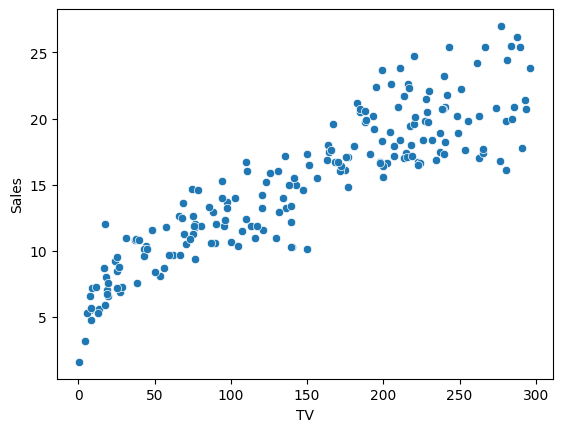

In [ ]:
# bivariate Analysis
sns.scatterplot(x='TV',y='Sales',data=df)


<Axes: xlabel='Radio', ylabel='Sales'>

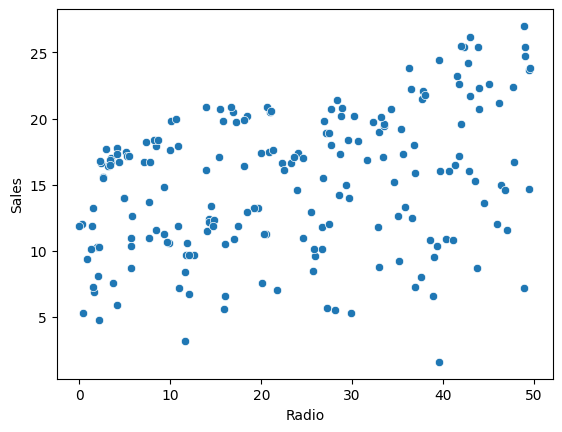

In [ ]:
sns.scatterplot(x='Radio',y='Sales',data=df)

<Axes: xlabel='Newspaper', ylabel='Sales'>

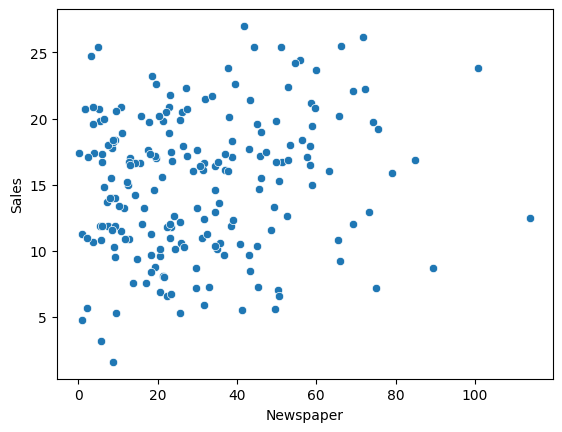

In [ ]:
sns.scatterplot(x='Newspaper',y='Sales',data=df)

The bivariate analysis indicates a clear relationship between TV advertising and sales, with a positive correlation evident in the graph. However, the other features—Radio and Newspaper—do not show any significant relationship with sales in this analysis.

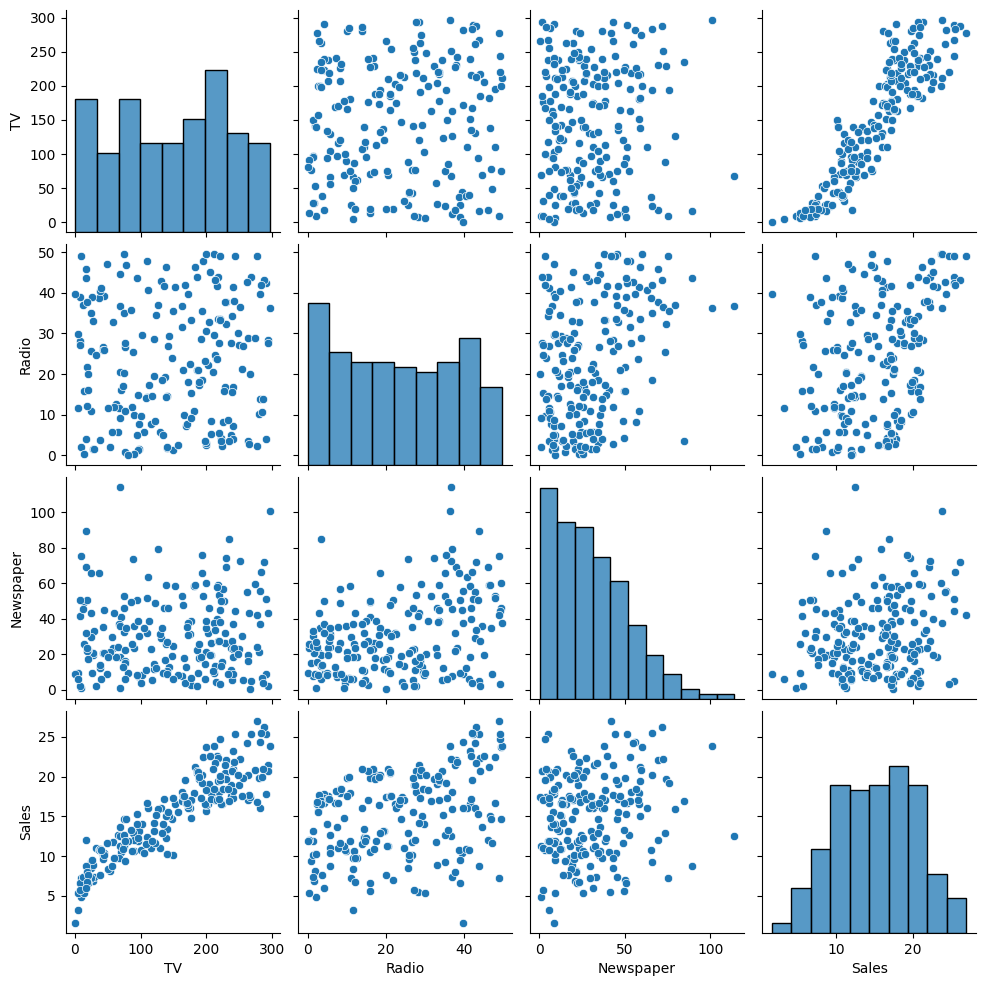

In [ ]:
# Multivariate Analysis
sns.pairplot(df)

 ## Data Preprocessing and Feature Engineering


In [ ]:
# step 1 checking for  null values.
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


<Axes: xlabel='TV'>

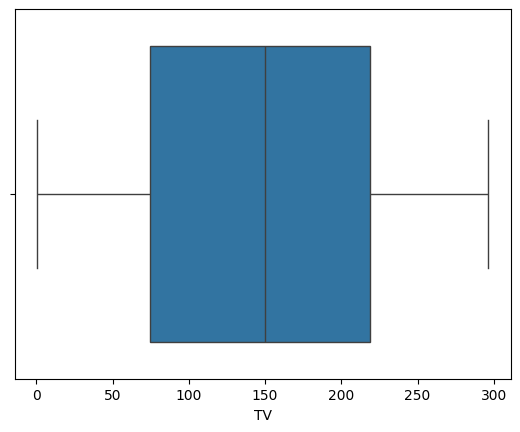

In [ ]:
# step 2 Checking for outliters
sns.boxplot(x='TV',data=df)

<Axes: xlabel='Radio'>

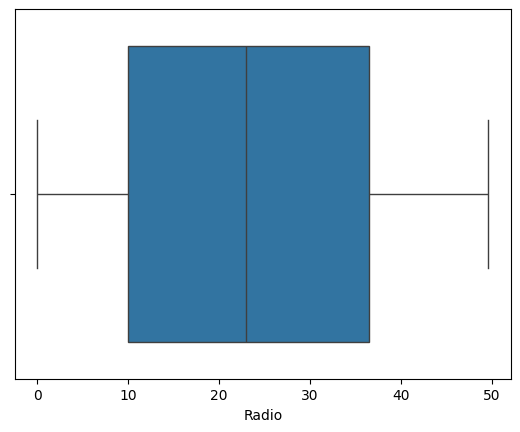

In [ ]:
sns.boxplot(x='Radio',data=df)

<Axes: xlabel='Newspaper'>

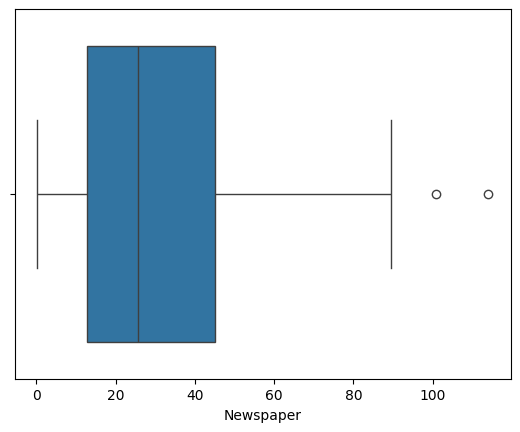

In [ ]:
sns.boxplot(x='Newspaper',data=df)

From the box plot analysis, it is evident that outliers are present only in the Newspaper advertising data. For accurate data prediction, it’s important to address these outliers, especially since the data does not follow a normal distribution. To handle the outliers effectively, we will use the median, ensuring a more robust analysis moving forward.

In [ ]:
# replacing the outliter from median , as in our data there are outliters values more than 90
df.loc[df['Newspaper']>90,'Newspaper']=np.median(df['Newspaper'])

In [ ]:
# Checking for correlation
df.corr()


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.901208
Radio,0.054809,1.000000,0.343141,0.349631
Newspaper,0.048462,0.343141,1.000000,0.149471
Sales,0.901208,0.349631,0.149471,1.000000


 From above correlation column I can conclude that TV has the strongest correlation with Sales  making it the most important predictor for a linear regression model.
Radio also has a moderate correlation with Sales, which can be useful as a predictor.
Newspaper has a weak correlation with Sales so it might contribute less predictive power, and we might remove it if it's not helpful in improving the model.

In [ ]:
# Feature Selection
df1 =df.drop('Sales',axis=1)


## Model Creation


In [ ]:

 # Step 1 Independent and dependent variable creation
X=df[['TV','Radio','Newspaper']] ## X variable contains all inputs
y=df.Sales ## y is output

In [ ]:
# To check Value features
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
# To check the Target value
y

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [ ]:
# step2 Traning and testing data for model creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
X_train.shape


(160, 3)

In [ ]:
y_train.shape


(160,)

In [ ]:
y_test.shape

(40,)

In [ ]:
X_test.shape

(40, 3)

In [ ]:
# Step 3 Creating the model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation


LR.fit(X_train,y_train) # training of linear regression



LinearRegression()

In [ ]:
y_predict=LR.predict(X_test)
y_predict

array([18.83484186, 16.36985844, 21.71645826, 24.88649821, 11.13965825,
       21.79572904, 12.46121948, 14.77982858, 12.17615532, 18.04926351,
       23.41494873, 18.21269493,  9.83347643, 14.91158836, 20.75246805,
       21.70973439, 21.21143002, 15.83902508,  9.63106988, 20.78172386,
       18.22440746, 21.03259637, 23.05056141,  9.97710854, 22.04870952,
       20.63323144, 15.8039098 , 11.1438683 , 19.24760852, 10.97744993,
       11.55124042, 10.5096322 , 16.49276989, 16.55648843, 18.13127528,
        7.3183334 , 17.3133353 , 12.97036072, 17.17083348, 12.12565091])

In [ ]:
y_test

,Sales
11,17.4
99,17.2
128,24.7
175,27.0
1,10.4
111,21.8
90,14.0
177,16.7
88,12.9
187,17.3


# Model Evaluation


## R2 Score

In [ ]:
# Step 4 Model Evalution

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [ ]:
r2score

0.9045606387869707

## Adjusted R2 Score

In [ ]:

adjusted_r2 = 1-(1-0.90)*(40-1)/(40-3-1)
adjusted_r2

0.8916666666666667

I am consedring additional metrics like
- MSE (Mean Squared Error)
- RMSE (Root Mean Squared Error)
- MAE   (Mean Absolute Error)
- MAD    (Mean Squared Error)
for a comprehensive evaluation of our model's performance.

In [ ]:
import math
print(mean_squared_error(y_test,y_predict))

2.0206367871381876


In [ ]:
print(math.sqrt(mean_squared_error(y_test,y_predict)))

1.4214910436362895


In [ ]:
print(mean_absolute_error(y_test,y_predict))

1.1059835540592287


In [ ]:
print(mean_squared_error(y_test, y_predict))


2.0206367871381876


Model Performance: Achieved an R² score of 0.90, indicating a strong fit with the data.